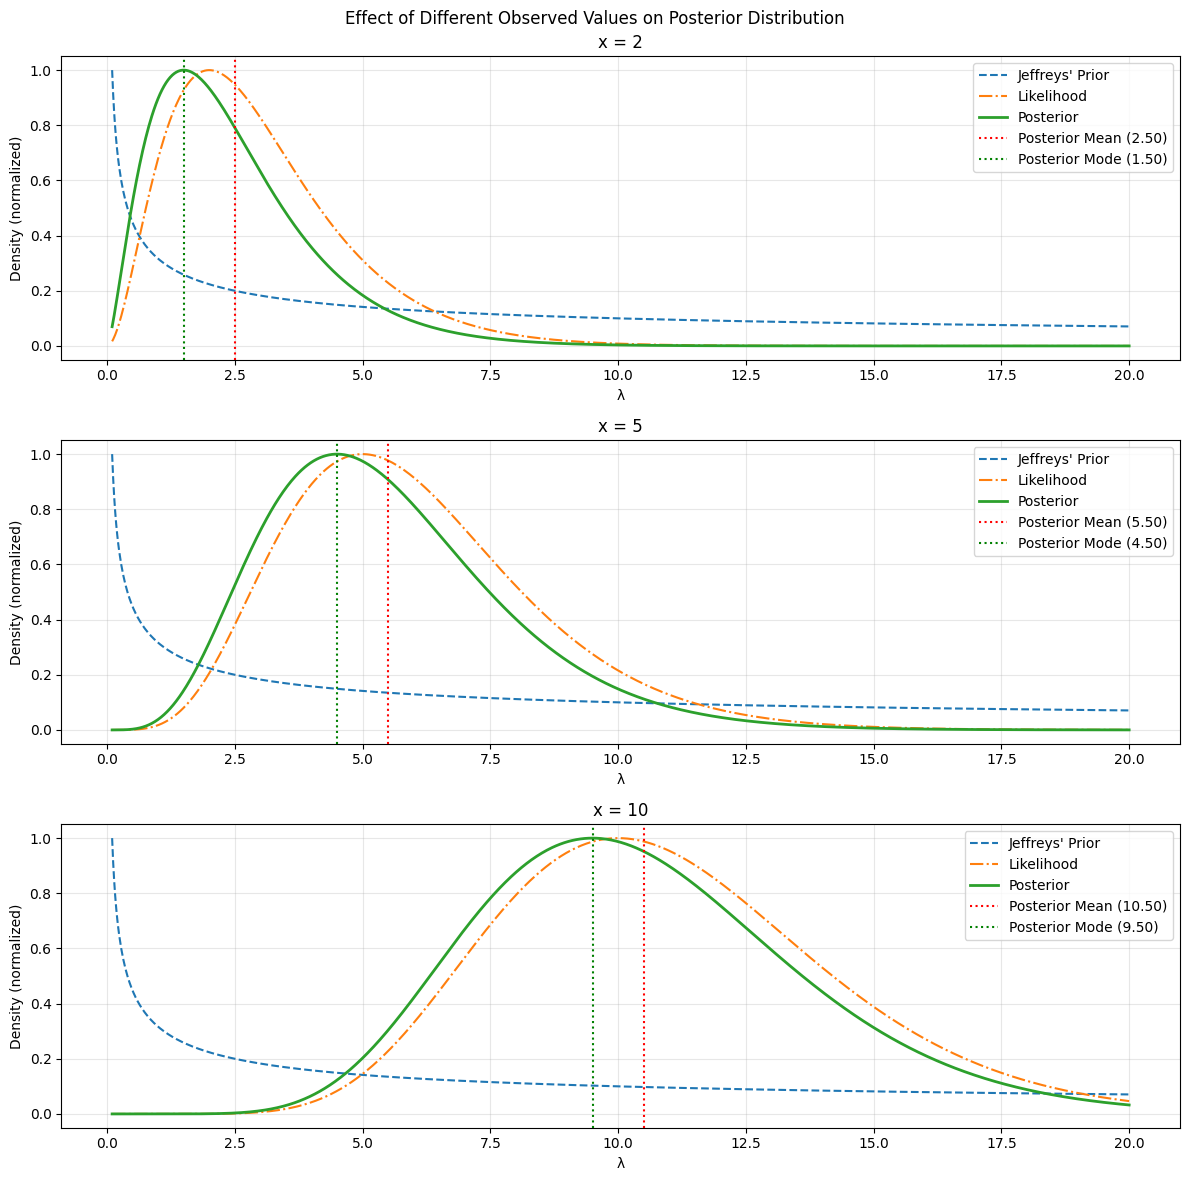

Integral of prior from 0.0001 to 1: 2.000
Integral of prior from 1 to 1000: 61.285
Total integral approximation: 63.285


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.special import factorial

def jeffreys_prior(lambda_vals):
    """Calculate the Jeffreys' prior for Poisson parameter."""
    return 1 / np.sqrt(lambda_vals)

def poisson_likelihood(x, lambda_vals):
    """Calculate the Poisson likelihood for given x and lambda values."""
    return np.exp(-lambda_vals) * lambda_vals**x / factorial(x)

def plot_distributions(x_obs, lambda_range=(0.1, 10), num_points=1000):
    """
    Create a plot showing the Jeffreys' prior, likelihood, and posterior
    for a Poisson distribution with observed value x_obs.
    """
    # Create lambda values for plotting
    lambda_vals = np.linspace(lambda_range[0], lambda_range[1], num_points)
    
    # Calculate distributions
    prior = jeffreys_prior(lambda_vals)
    likelihood = poisson_likelihood(x_obs, lambda_vals)
    
    # The posterior is proportional to likelihood * prior
    # We know it follows Gamma(x + 1/2, 1)
    posterior = gamma.pdf(lambda_vals, a=x_obs + 0.5, scale=1)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot all distributions
    plt.plot(lambda_vals, prior/prior.max(), 
             label="Jeffreys' Prior (normalized)", 
             linestyle='--')
    plt.plot(lambda_vals, likelihood/likelihood.max(), 
             label='Likelihood (normalized)', 
             linestyle='-.')
    plt.plot(lambda_vals, posterior/posterior.max(), 
             label='Posterior (normalized)', 
             linewidth=2)
    
    # Add vertical lines for posterior mean and mode
    post_mean = x_obs + 0.5  # Mean of Gamma(x + 1/2, 1)
    post_mode = max(0, x_obs - 0.5)  # Mode of Gamma(x + 1/2, 1)
    plt.axvline(post_mean, color='r', linestyle=':', 
                label=f'Posterior Mean (λ = {post_mean:.2f})')
    plt.axvline(post_mode, color='g', linestyle=':', 
                label=f'Posterior Mode (λ = {post_mode:.2f})')
    
    # Calculate and plot 95% credible interval
    ci_lower, ci_upper = gamma.interval(0.95, a=x_obs + 0.5, scale=1)
    plt.axvspan(ci_lower, ci_upper, alpha=0.2, color='gray', 
                label='95% Credible Interval')
    
    # Customize the plot
    plt.xlabel('λ')
    plt.ylabel('Density (normalized)')
    plt.title(f'Poisson Distributions with Jeffreys\' Prior (x = {x_obs})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    return plt.gcf()

# Create plots for different observed values
x_values = [2, 5, 10]
fig, axes = plt.subplots(len(x_values), 1, figsize=(12, 4*len(x_values)))
fig.suptitle('Effect of Different Observed Values on Posterior Distribution')

for i, x in enumerate(x_values):
    # Calculate distributions
    lambda_vals = np.linspace(0.1, 20, 1000)
    prior = jeffreys_prior(lambda_vals)
    likelihood = poisson_likelihood(x, lambda_vals)
    posterior = gamma.pdf(lambda_vals, a=x + 0.5, scale=1)
    
    # Plot on the appropriate subplot
    axes[i].plot(lambda_vals, prior/prior.max(), 
                 label="Jeffreys' Prior", linestyle='--')
    axes[i].plot(lambda_vals, likelihood/likelihood.max(), 
                 label='Likelihood', linestyle='-.')
    axes[i].plot(lambda_vals, posterior/posterior.max(), 
                 label='Posterior', linewidth=2)
    
    # Add vertical lines for mean and mode
    post_mean = x + 0.5
    post_mode = max(0, x - 0.5)
    axes[i].axvline(post_mean, color='r', linestyle=':', 
                    label=f'Posterior Mean ({post_mean:.2f})')
    axes[i].axvline(post_mode, color='g', linestyle=':', 
                    label=f'Posterior Mode ({post_mode:.2f})')
    
    # Customize each subplot
    axes[i].set_xlabel('λ')
    axes[i].set_ylabel('Density (normalized)')
    axes[i].set_title(f'x = {x}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Demonstrate that the prior is improper
lambda_vals_small = np.linspace(0.0001, 1, 1000)
integral_small = np.trapz(jeffreys_prior(lambda_vals_small), lambda_vals_small)
print(f"Integral of prior from 0.0001 to 1: {integral_small:.3f}")

lambda_vals_large = np.linspace(1, 1000, 1000)
integral_large = np.trapz(jeffreys_prior(lambda_vals_large), lambda_vals_large)
print(f"Integral of prior from 1 to 1000: {integral_large:.3f}")
print(f"Total integral approximation: {integral_small + integral_large:.3f}")